# Analysis of the World Happiness Report 2024 dataset
## Source: 
The dataset is available on [Kaggle](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024) and the official World Happiness Report [website](https://worldhappiness.report/).


## Description: 
The World Happiness Report is a landmark survey of the state of global happiness. It ranks countries based on respondents' self-assessed life evaluations, considering factors like `GDP per capita`, `social support`, `healthy life expectancy`, `freedom to make life choices`, `generosity`, and `perceptions of corruption`.

# 1. Load the data and understand about it

In [1]:
# Load necessary library

import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('../data/happiness-data.csv')
# Display the first few rows of the dataset
print(df.head())


       Country  Happiness Rank  Happiness Score   Economy    Family    Health  \
0       Norway               1            7.537  1.616463  1.533524  0.796667   
1      Denmark               2            7.522  1.482383  1.551122  0.792566   
2      Iceland               3            7.504  1.480633  1.610574  0.833552   
3  Switzerland               4            7.494  1.564980  1.516912  0.858131   
4      Finland               5            7.469  1.443572  1.540247  0.809158   

    Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
0  0.635423    0.362012    0.315964  2.277027              94.6   
1  0.626007    0.355280    0.400770  2.313707              93.5   
2  0.627163    0.475540    0.153527  2.322715              94.5   
3  0.620071    0.290549    0.367007  2.276716              93.7   
4  0.617951    0.245483    0.382612  2.430182              91.2   

           Region  
0  Western Europe  
1  Western Europe  
2  Western Europe  
3  Western Europe  
4  Western

In [3]:
# Check the data types of the columns and shape of the dataset
print(df.shape)

(153, 12)


In [4]:
# Check the data types of the columns
print(df.dtypes)

Country              object
Happiness Rank        int64
Happiness Score     float64
Economy             float64
Family              float64
Health              float64
Freedom             float64
Generosity          float64
Corruption          float64
Dystopia            float64
Job Satisfaction    float64
Region               object
dtype: object


## Data Types:

Country, Region: Categorical

Happiness Rank: Integer

Happiness Score: Float

Other columns: Float

In [6]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           153 non-null    object 
 1   Happiness Rank    153 non-null    int64  
 2   Happiness Score   153 non-null    float64
 3   Economy           153 non-null    float64
 4   Family            153 non-null    float64
 5   Health            153 non-null    float64
 6   Freedom           153 non-null    float64
 7   Generosity        153 non-null    float64
 8   Corruption        153 non-null    float64
 9   Dystopia          153 non-null    float64
 10  Job Satisfaction  151 non-null    float64
 11  Region            153 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 14.5+ KB


In [30]:
# see the column names
print(df.columns)

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'Corruption', 'Dystopia',
       'Job Satisfaction', 'Region'],
      dtype='object')


# Purpose of Analysis
## Primary Goal: To understand the factors influencing the happiness scores of countries and predict happiness scores based on these factors.

### Type of Analysis:

#### - Regression: Predicting the Happiness Score using features like Economy, Health, Job satisfaction etc.

#### - Clustering: Grouping countries with similar profiles based on the available features.

### Why Regression?: The Happiness Score is a continuous variable, making regression suitable for prediction.

### Why Clustering?: To identify patterns and groupings among countries that share similar characteristics.

## EDA:
- Check missing values
- Handle duplicates

In [7]:
# check the null values
print(df.isnull().sum())

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    2
Region              0
dtype: int64


In [10]:
# we see two rows with null values
# see the rows with null values
print(df[df.isnull().any(axis=1)])

          Country  Happiness Rank  Happiness Score   Economy    Family  \
59   North Cyprus              61            5.810  1.346911  1.186303   
144   South Sudan             147            3.591  0.397249  0.601323   

       Health   Freedom  Generosity  Corruption  Dystopia  Job Satisfaction  \
59   0.834647  0.471204    0.266846    0.155353  1.549158               NaN   
144  0.163486  0.147062    0.285671    0.116794  1.879567               NaN   

             Region  
59   Eastern Europe  
144          Africa  


In [ ]:
# Job satisfaction has 2 null values
# we can drop the rows with null values or fill them with a value

#Since we have only 153 records, it may not be a good idea to drop the rows with null values rather we can fill them with a value
# fill the null values with the median of the column from their respective region
df['Job Satisfaction'] = df.groupby('Region')['Job Satisfaction'].transform(lambda x: x.fillna(x.median()))
# check the null values again
print(df.isnull().sum())

Country             0
Happiness Rank      0
Happiness Score     0
Economy             0
Family              0
Health              0
Freedom             0
Generosity          0
Corruption          0
Dystopia            0
Job Satisfaction    0
Region              0
dtype: int64


In [12]:
# check the duplicates
print(df.duplicated().sum())

0


In [13]:
# check the null values in the 'Happiness Score' column
print(df['Happiness Score'].isnull().sum())

0


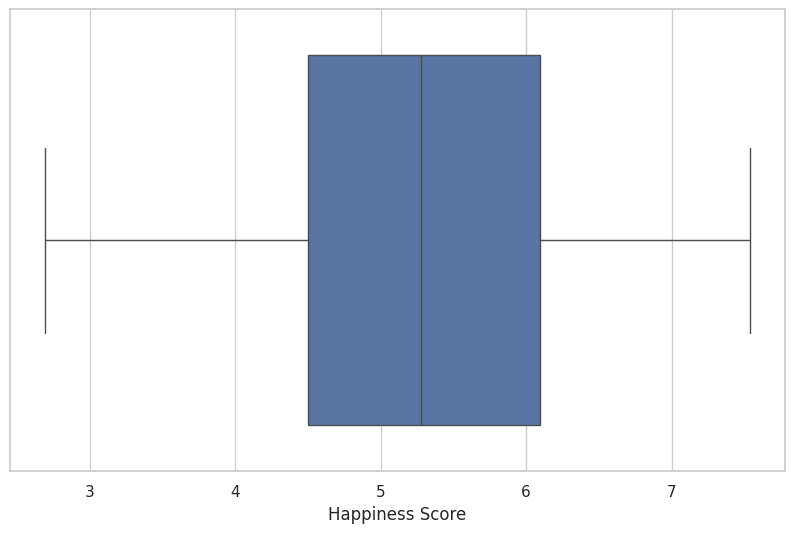

In [ ]:
# See the outliers in the data
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the seaborn
sns.set_theme(style="whitegrid")
# set the figure size
plt.figure(figsize=(10, 6))
# plot the boxplot of the 'Happiness Score' column
sns.boxplot(x=df['Happiness Score'])
# show the plot
plt.show()

## Data visualization

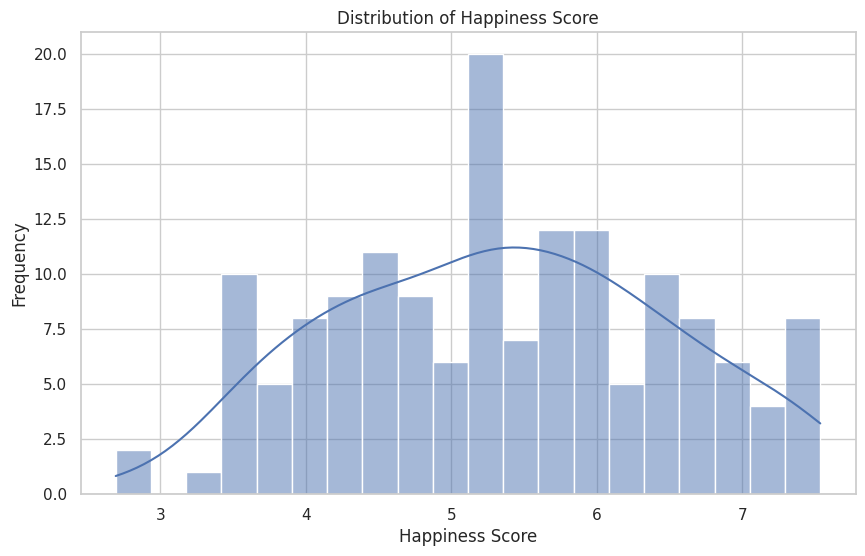

In [ ]:

# set the figure size
plt.figure(figsize=(10, 6))
# plot the histogram of the 'Happiness Score' column
sns.histplot(df['Happiness Score'], bins=20, kde=True)
# show the plot
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# Correlation heatmap to see relationships between variables.
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()
# check the correlation between the 'Happiness Score' and 'Job Satisfaction' columns
print(df[['Happiness Score', 'Job Satisfaction']].corr().iloc[0, 1])



0.8152151690947983


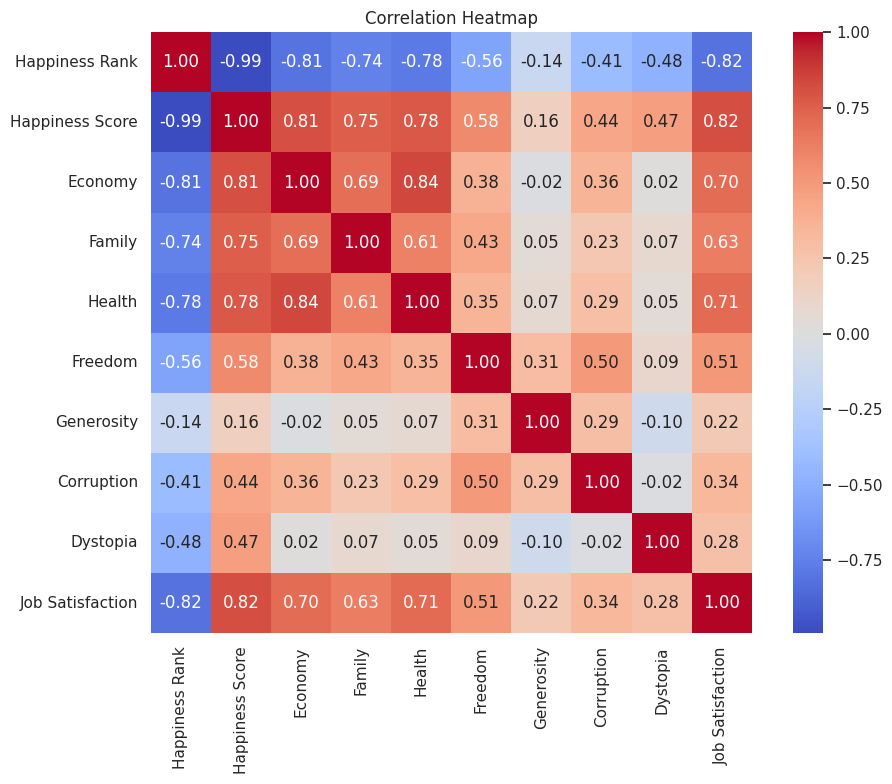

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: adjust size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Step 3: Add title and show
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## Our interest is to see the correlation between the 'Happiness Score' and other columns
We can observe that the 'Happiness Score' has a strong positive correlation with `'Job Satisfaction' (0.82) and 'Economy' (0.81), family (0.75) and health(0.78)`.


# Model Fitting

## Regression Models:
Linear Regression: Simple model to understand linear relationships.

## Clustering Models:
K-Means Clustering: Groups countries into clusters based on feature similarity.

# Let's begin with Regression model

## Let's observe the relationship between 'Happiness Score' and and other vaiables using a scatter plot.

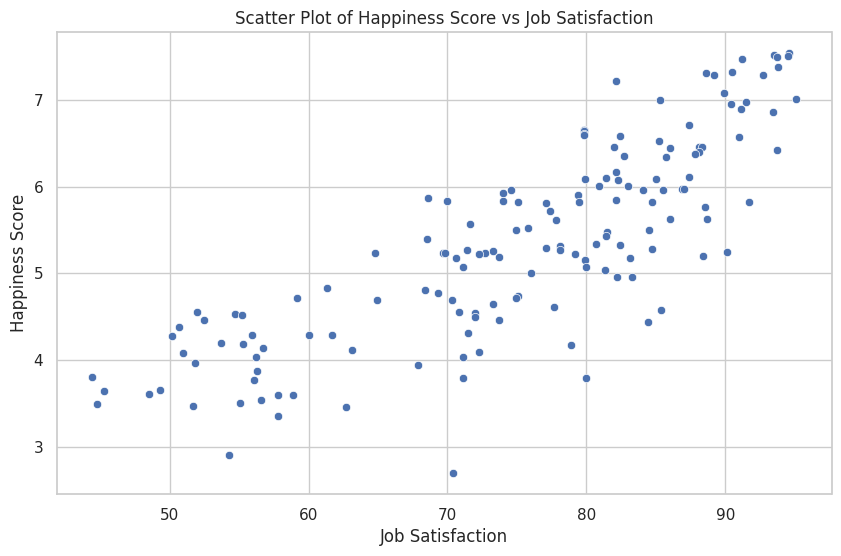

In [24]:
# Select the variables for the regression model
# Plot the scatter plot of the 'Happiness Score' and 'Job Satisfaction' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Happiness Score', x='Job Satisfaction', data=df)
plt.title('Scatter Plot of Happiness Score vs Job Satisfaction')
plt.ylabel('Happiness Score')
plt.xlabel('Job Satisfaction')
plt.show()

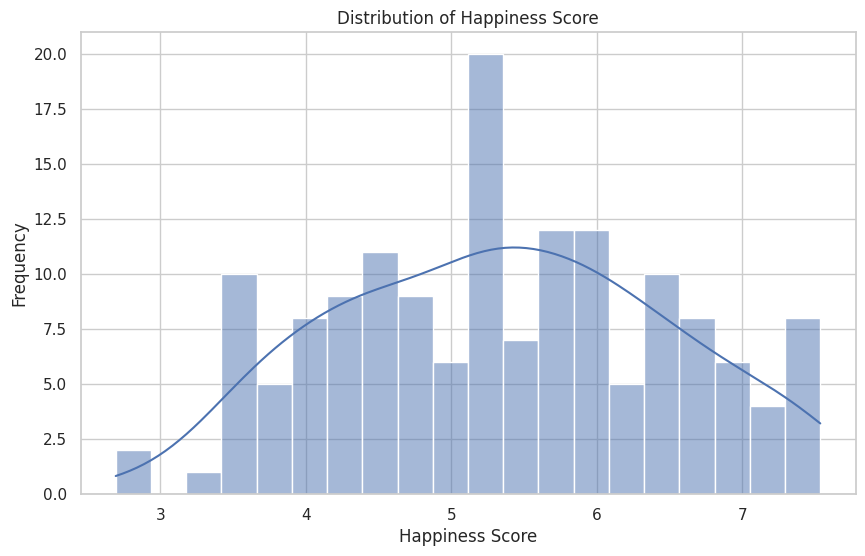

In [25]:
# check the distribution of the 'Happiness Score' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


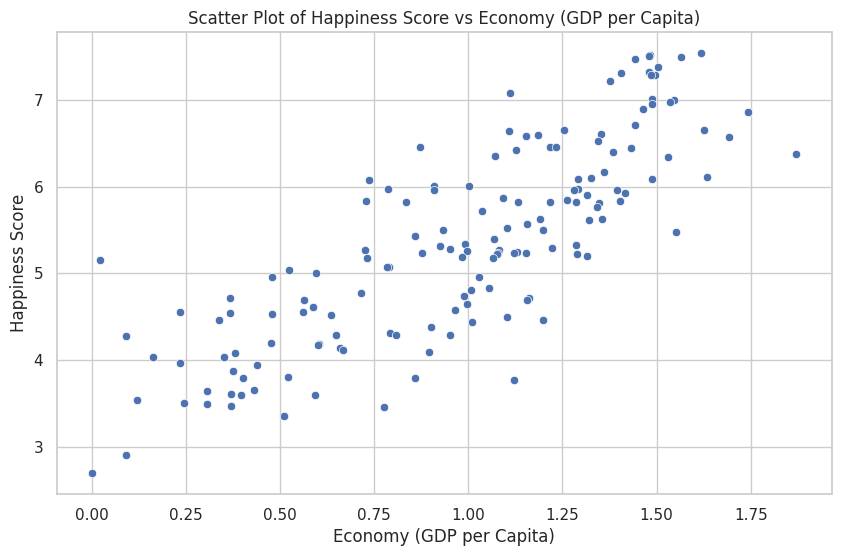

In [27]:
# scatter plot of the happiness score and economy
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Happiness Score', x='Economy', data=df)
plt.title('Scatter Plot of Happiness Score vs Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.show()


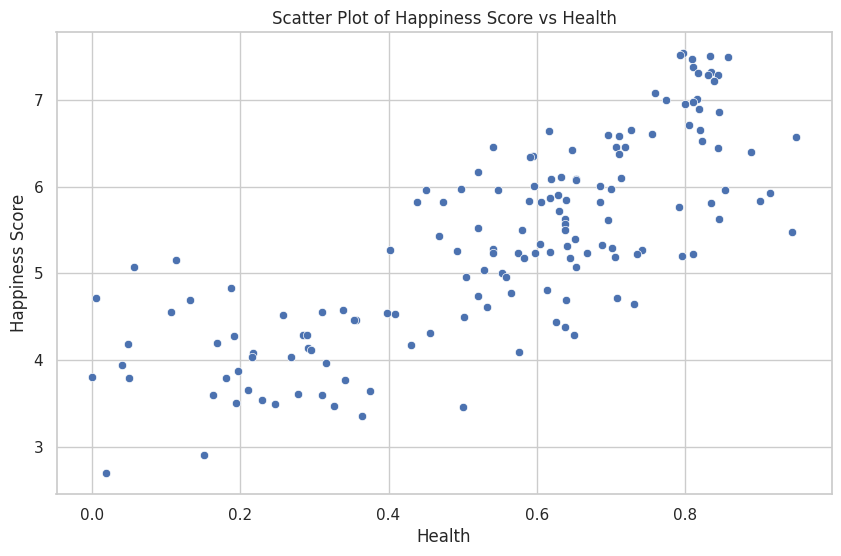

In [28]:
# scatter plot of the happiness score and economy
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Happiness Score', x='Health', data=df)
plt.title('Scatter Plot of Happiness Score vs Health')
plt.ylabel('Happiness Score')
plt.xlabel('Health')
plt.show()

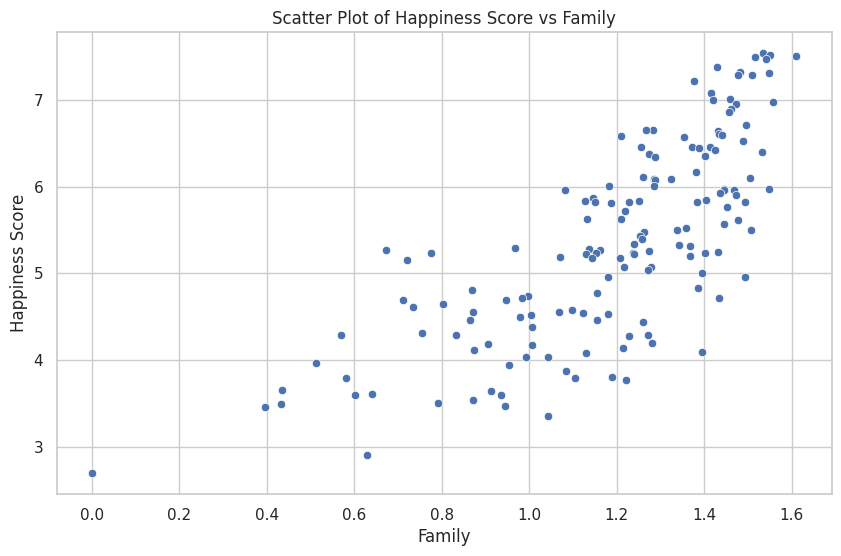

In [29]:
# scatter plot of the happiness score and economy
plt.figure(figsize=(10, 6))
sns.scatterplot(y='Happiness Score', x='Family', data=df)
plt.title('Scatter Plot of Happiness Score vs Family')
plt.ylabel('Happiness Score')
plt.xlabel('Family')
plt.show()

# Now. let's fit the model
## Now fit a linear regression model to predict the happiness score based on the job satisfaction, economy, health, family

In [ ]:
# Now fit a linear regression model to predict the happiness score based on the job satisfaction and economy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Select the features and target variable
X = df[['Job Satisfaction', 'Economy', 'Health', 'Family']]
y = df['Happiness Score']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(X_train.head())
print(y_train.head())


(122, 4)
(31, 4)
(122,)
(31,)
     Job Satisfaction   Economy    Health    Family
58               79.5  1.284556  0.606042  1.384369
14               91.5  1.535707  0.809783  1.558231
125              55.3  0.603049  0.048642  0.904780
63               88.7  1.355938  0.844715  1.131363
107              77.7  0.586683  0.533241  0.735132
58     5.819
14     6.977
125    4.180
63     5.621
107    4.608
Name: Happiness Score, dtype: float64


In [35]:
print(X_test.head())
print(y_test.head())

     Job Satisfaction   Economy    Health    Family
37               87.4  1.632952  0.632106  1.259699
6                90.5  1.479204  0.834558  1.481349
113              55.2  0.636407  0.257836  1.003187
61               77.4  1.035225  0.630166  1.218770
60               88.5  1.341206  0.790828  1.452519
37     6.105
6      7.316
113    4.514
61     5.715
60     5.758
Name: Happiness Score, dtype: float64


## Let's fit the model now...

In [38]:
# model training
model = LinearRegression()


In [39]:
# fit the model on training data
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# see the model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [0.03508878 0.63865763 0.58311383 1.02861318]
Intercept: 0.5277069825742897


In [41]:
# predict the target variable on the test data
y_pred = model.predict(X_test)
# print the predicted values
print('Predicted values:', y_pred)
# print the actual values
print('Actual values:', y_test.values)


Predicted values: [6.30169646 6.65832422 4.0532932  5.52583515 6.44485856 6.23824272
 6.1941348  5.87759595 5.70495478 3.52340434 4.50784382 5.86679186
 3.28541362 5.46758316 4.19511062 5.40625956 4.11527842 6.10653272
 4.6757335  6.93192796 5.30340875 5.81501968 6.65099045 5.9025833
 4.06198784 6.38545411 4.13299082 4.53172628 3.62089953 3.84989883
 3.98954486]
Actual values: [6.10500002 7.31599999 4.51399994 5.71500015 5.7579999  6.45200014
 6.09800005 5.22700024 5.83799982 3.59100008 5.23500013 6.63500023
 3.60299993 4.57399988 3.93600011 4.0960002  3.59299993 6.60900021
 4.54500008 7.50400019 5.17500019 6.57800007 7.28399992 6.35699987
 4.28599977 6.52699995 4.19000006 4.46500015 3.53299999 4.08099985
 4.55299997]


In [42]:
# calculate the error metrics of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)



Mean Squared Error: 0.2588919182328991
Root Mean Squared Error: 0.5088142276242864
R2 Score: 0.8246837303811574


## Model performance evaluation
### 1. Mean Squared Error (MSE): 0.2589
This is the average of the squared differences between actual and predicted values.

Since it's squared, it penalizes large errors more than small ones.

`On our scale (likely 0–10 for happiness scores), an MSE of 0.25 means that, on average, predictions are quite close to the actual values.
`
### 2. Root Mean Squared Error (RMSE): 0.5088
This is the square root of MSE, giving the error in the original unit (same as the target variable: Happiness score).

An RMSE of 0.51 means predictions are off by about half a point on average.

`For a scale of 0 to 10, this is a relatively low error, which is good.`

### 3. R² Score: 0.8247 (≈ 82.5%)
This tells us how much of the variance in the target (Happiness score) is explained by the model.

An R² of 0.82 means that `82.5%` of the variation in happiness scores is explained by the features used (`like Job satisfaction, Economy, Family, Health`).

### What do you say, is it a strong fit??, especially for social science data, where some level of noise is expected. I would say YES..

## Now let's observe model performance on training data

In [43]:
# check the model performance on the training data
y_train_pred = model.predict(X_train)
# calculate the error metrics of the model
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error on training data:', mse_train)
rmse_train = mse_train ** 0.5
print('Root Mean Squared Error on training data:', rmse_train)
r2_train = r2_score(y_train, y_train_pred)
print('R2 Score on training data:', r2_train)

Mean Squared Error on training data: 0.23163203282638628
Root Mean Squared Error on training data: 0.48128165644078547
R2 Score on training data: 0.8114701923324975


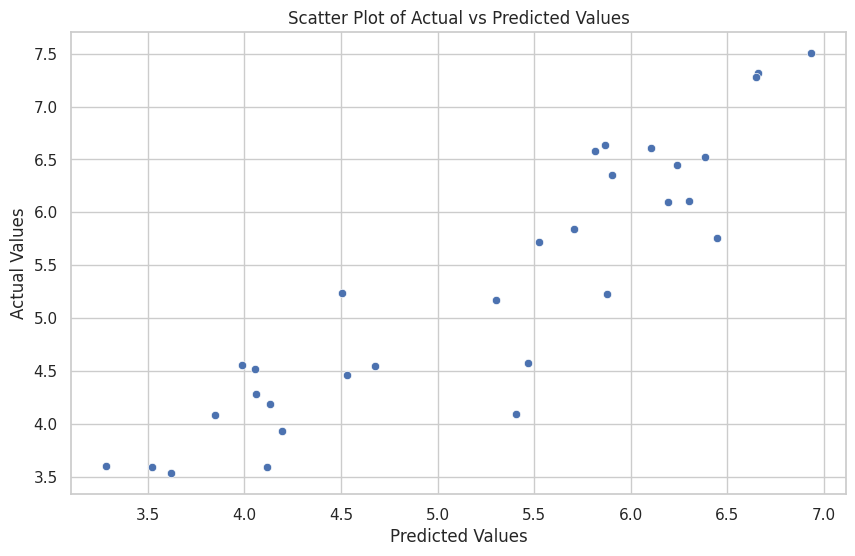

In [44]:
# Plot the predicted values vs actual values
plt.figure(figsize=(10, 6))
# plot the scatter plot of the actual vs predicted values
sns.scatterplot(y=y_test, x=y_pred)
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

We can observe some difference in the predicted and actual value....

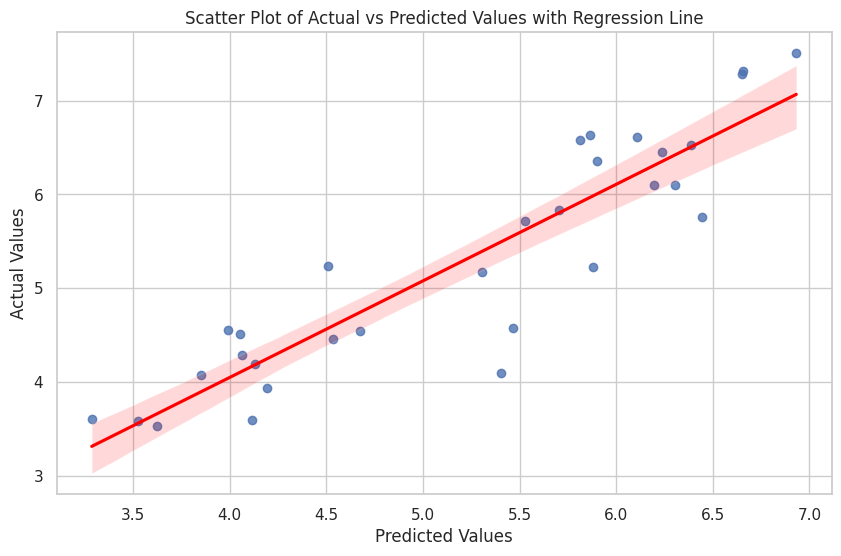

In [49]:
# Plot the predicted values vs actual values with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"})
plt.title('Scatter Plot of Actual vs Predicted Values with Regression Line')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

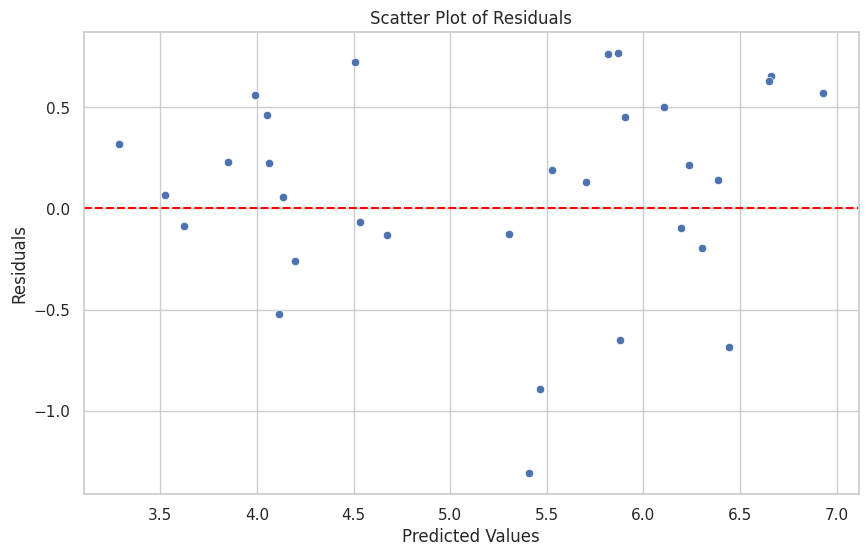

In [45]:
# plot the residuals(Error) vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(y=y_test - y_pred, x=y_pred)
plt.title('Scatter Plot of Residuals')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

From the graph we can see that the values above redline are the predictions lower than actual value and vice versa

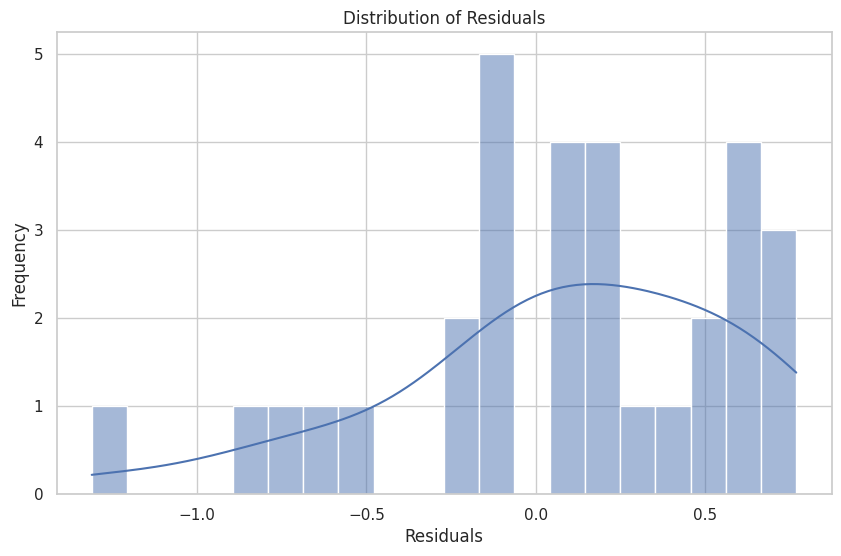

In [46]:
# check the distribution of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

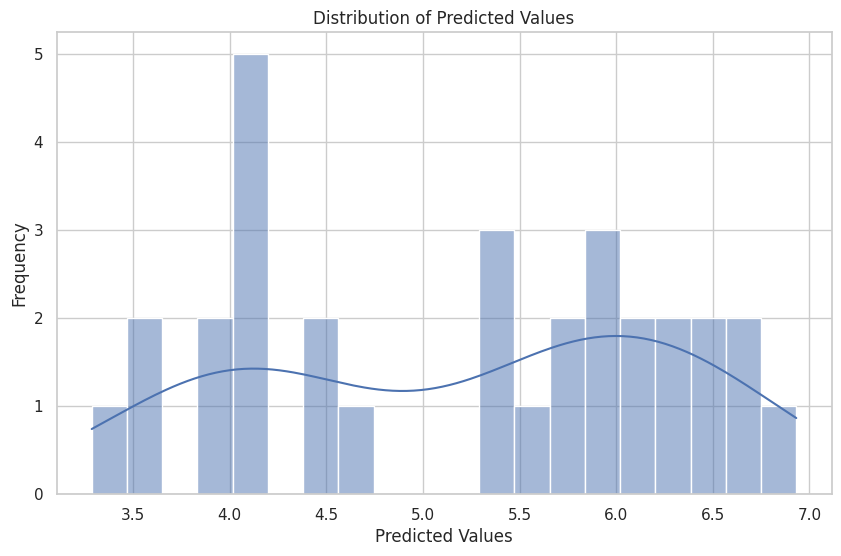

In [47]:
# check the distribution of the predicted values
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=20, kde=True)
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()

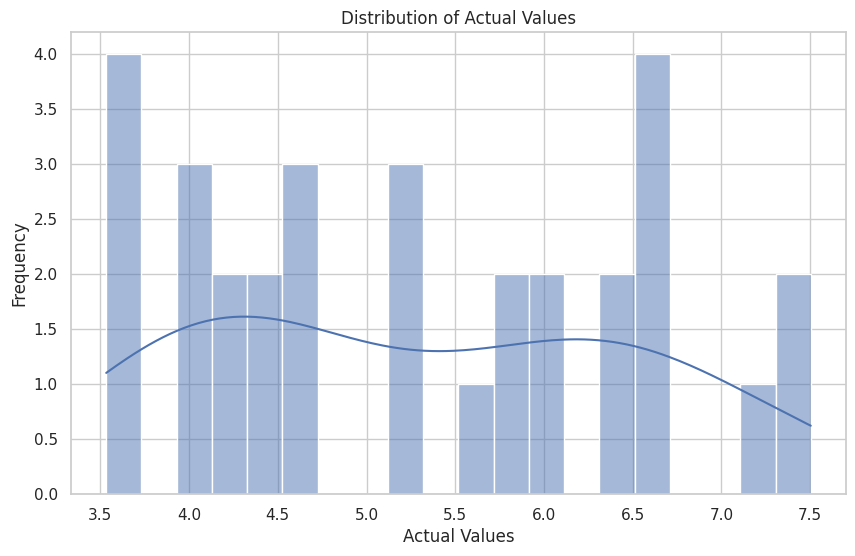

In [48]:

# check the distribution of the actual values
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=20, kde=True)
plt.title('Distribution of Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Frequency')
plt.show()


In [50]:
# Let's make predictions on the sample data
sample_data = pd.DataFrame({
    'Job Satisfaction': [7, 8, 6],
    'Economy': [1.5, 1.8, 1.2],
    'Health': [0.9, 0.95, 0.85],
    'Family': [0.8, 0.85, 0.75]
})
# make predictions on the sample data
sample_predictions = model.predict(sample_data)
# print the predictions
print('Sample Predictions:', sample_predictions)


Sample Predictions: [3.07900789 3.38628031 2.77173547]


# Clustering


## 1. Select Features for Clustering


In [51]:
# K-Means Clustering: Groups countries into clusters based on feature similarity.
features = [
    'Economy',
    'Job Satisfaction',
    'Family',
    'Health',
    'Freedom',
    'Generosity',
    'Corruption',
]
X = df[features]


## 2. Scale the Features (Standardization is essential)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Use Elbow Method to Choose Optimal k (number of clusters)

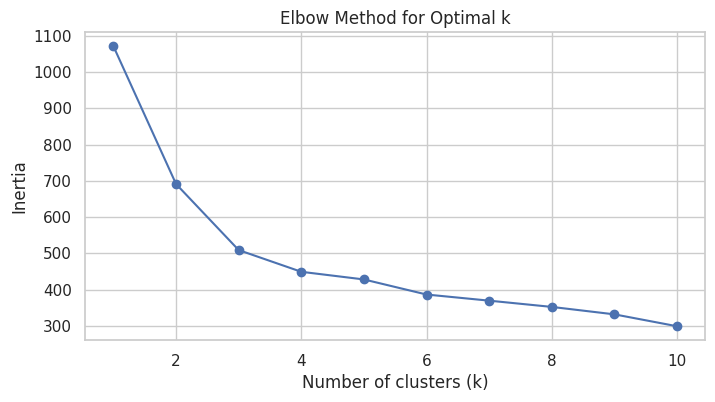

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


## May be we can choose k = 3, as it seems to have elbow at 3

## 4. Apply K-Means with chosen k

In [55]:
optimal_k = 3  # for example, from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters


# 5. Analyze and Visualize the Clusters

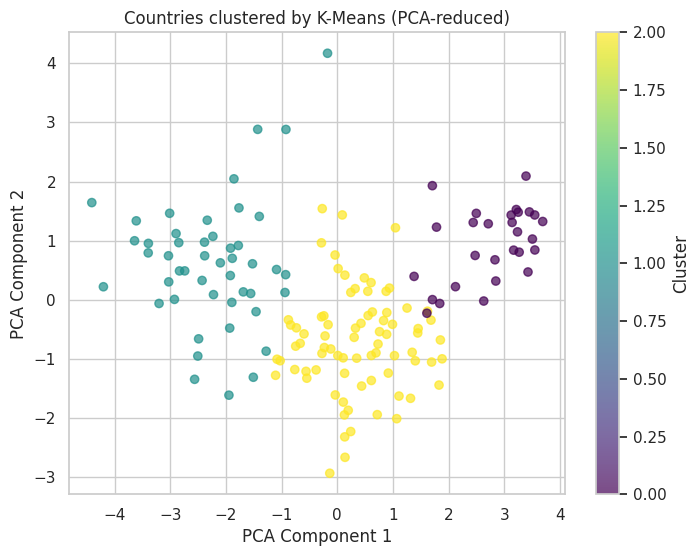

In [56]:
# Average values by cluster
cluster_summary = df.groupby('Cluster')[features].mean()

# Optional: 2D visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Countries clustered by K-Means (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


4. Cluster Insights (what next?)

In [57]:
df.groupby('Cluster')[features].mean()

,Economy,Job Satisfaction,Family,Health,Freedom,Generosity,Corruption
Cluster,,,,,,,
0,1.480052,89.542857,1.446756,0.767991,0.570965,0.366136,0.285139
1,0.505013,60.397872,0.876423,0.273222,0.322231,0.250866,0.104878
2,1.091477,78.791026,1.280172,0.638753,0.402140,0.198615,0.076068


## Cluster Profiles
### Cluster 0: "High Well-Being Nations"
- Highest values across all features.

- High GDP, job satisfaction, social support, health, freedom, and even perceived generosity.

- Moderate corruption perception.

- 💡 Likely represents developed, high-income countries with strong institutions and good quality of life.

### Cluster 1: "Low Well-Being Nations"
- Lowest across all categories.

- Very low economy, health, and social support.

- Low generosity and least job satisfaction (60.4).

- 💡 These could be developing or under-resourced nations struggling in multiple well-being areas.

### Cluster 2: "Moderate Well-Being Nations"
- Middle values in almost all categories.

- Decent economy, job satisfaction, and family support.

- Lower health and generosity compared to cluster 0.

- 💡 Represents emerging economies or transitional nations—not top-tier yet but improving.

## The analysis dimension is unlimited. That's all for today.


#### I would be thankful for your insightful feedbacks.

### Thank You